In [1]:
%matplotlib inline
import rootpy.ROOT as R
R.gROOT.SetBatch(True)
from rootpy.io import root_open, DoesNotExist
from rootpy.plotting import Canvas, Hist, Legend
import rootpy.plotting.root2matplotlib as rplt
import matplotlib.pyplot as plt

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [27]:
f1 = root_open( "setA_eta_cut_1p0.root" )
f2 = root_open( "deepti_setA.root" )

In [28]:
c1 = Canvas( width=800, height=600 )
c2 = Canvas( width=800, height=300 )

In [47]:
print "Number of Events"
print "Deepti: ", f2.VertexZ.GetEntries()
print "Daniel: ", f1.event_vZ.GetEntries()
print "Daniel - Deepti = ", (f1.event_vZ.GetEntries() - f2.VertexZ.GetEntries() )

print "Number of Tracks"
print "Deepti: ", f2.hnhits.GetEntries()
print "Daniel: ", f1.track_nHitsFit.GetEntries()
print "Daniel - Deepti = ", ( f1.track_nHitsFit.GetEntries() - f2.hnhits.GetEntries() )
print "Percent diff = ", (( f1.track_nHitsFit.GetEntries() - f2.hnhits.GetEntries() )/( f1.track_nHitsFit.GetEntries() ))*100, "%"

Number of Events
Deepti:  93141.0
Daniel:  93146.0
Daniel - Deepti =  5.0
Number of Tracks
Deepti:  13421966.0
Daniel:  13246156.0
Daniel - Deepti =  -175810.0
Percent diff =  -1.32725297815 %


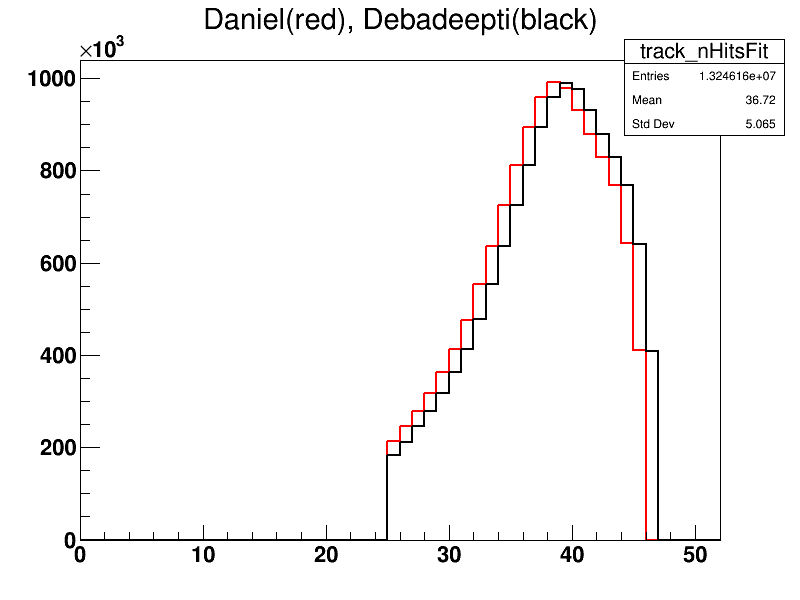

In [50]:
c1.cd()
h1 = f1.track_nHitsFit
h1.SetLineWidth( 2 )
h1.SetTitle( "Daniel(red), Debadeepti(black)" )
h2 = f2.hnhits
h2.SetLineWidth( 2 )
h1.SetLineColor( R.kRed )
f1.track_nHitsFit.Draw()
h2.Draw("same")
c1.Print( "compare_track_nHitsFit.pdf" )
c1

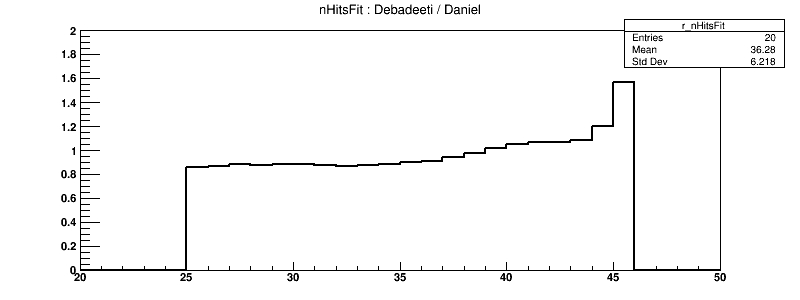

In [51]:
c2.cd()
hr = h2.Clone( "r_nHitsFit" )
hr.SetTitle( "nHitsFit : Debadeeti / Daniel" )
hr.GetYaxis().SetRangeUser( 0, 2 )
hr.GetXaxis().SetRangeUser( 20, 50 )
hr.Divide( h1 )

hr.Draw()
c2.Print( "nHitsFit_deepti_over_daniel.pdf" )
c2

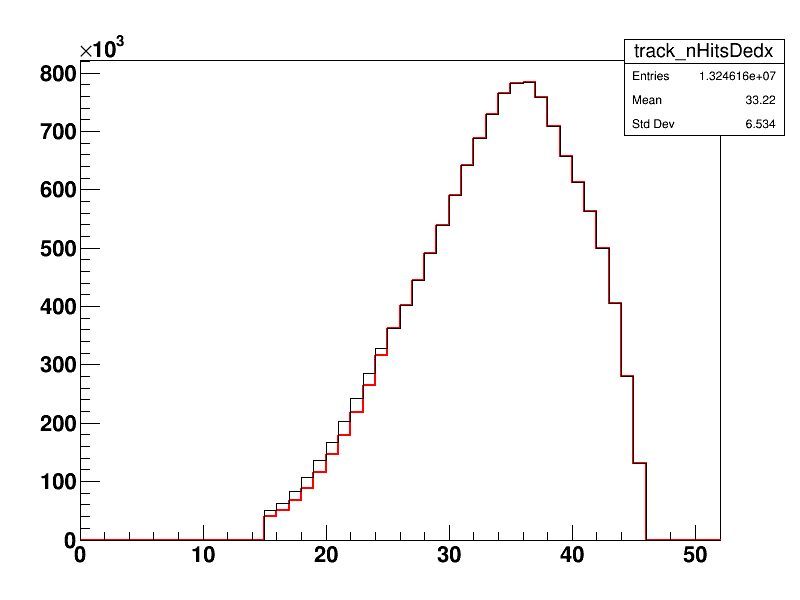

In [34]:
c1.cd()
h1 = f1.track_nHitsDedx
h2 = f2.hndedx;
h1.SetLineColor( R.kRed )
h1.SetLineWidth(2)
h1.Draw()
h2.Draw("same")
c1

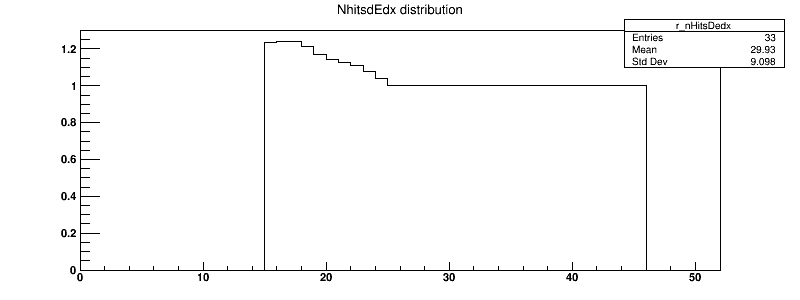

In [35]:
c2.cd()
hr = h2.Clone( "r_nHitsDedx" )
hr.Divide( h1 )
hr.Draw()
c2

In [ ]:
h1 = f1.track_nHitsDedx
h1.SetLineColor( R.kRed )
h1.SetLineWidth(2)
h1.Draw()
f2.hndedx.Draw("same")
c

In [26]:
f1.close()
f2.close()

False